### Configuration and imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
dir_path= './data'

### Data analysis

In [3]:
data_path = os.path.join(dir_path, 'diabetes_simple.csv')
df = pd.read_csv(data_path)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49510 entries, 0 to 49509
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               49510 non-null  object 
 1   age                  49510 non-null  float64
 2   hypertension         49510 non-null  int64  
 3   heart_disease        49510 non-null  int64  
 4   smoking_history      49510 non-null  object 
 5   bmi                  49510 non-null  float64
 6   HbA1c_level          49510 non-null  float64
 7   blood_glucose_level  49510 non-null  int64  
 8   diabetes             49510 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
df.shape

(49510, 9)

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000,49510.000000
mean,41.866524,0.075258,0.038921,27.344097,5.527237,137.874692,0.086690
std,22.478834,0.263809,0.193410,6.665177,1.074451,40.996851,0.281382
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.640000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.600000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [ ]:
columns = df.columns.tolist()
target_colum = 'diabetes'

columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Visualizing proportions between the columns

In [ ]:
cols = 3
rows = 2
ordinal_and_categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

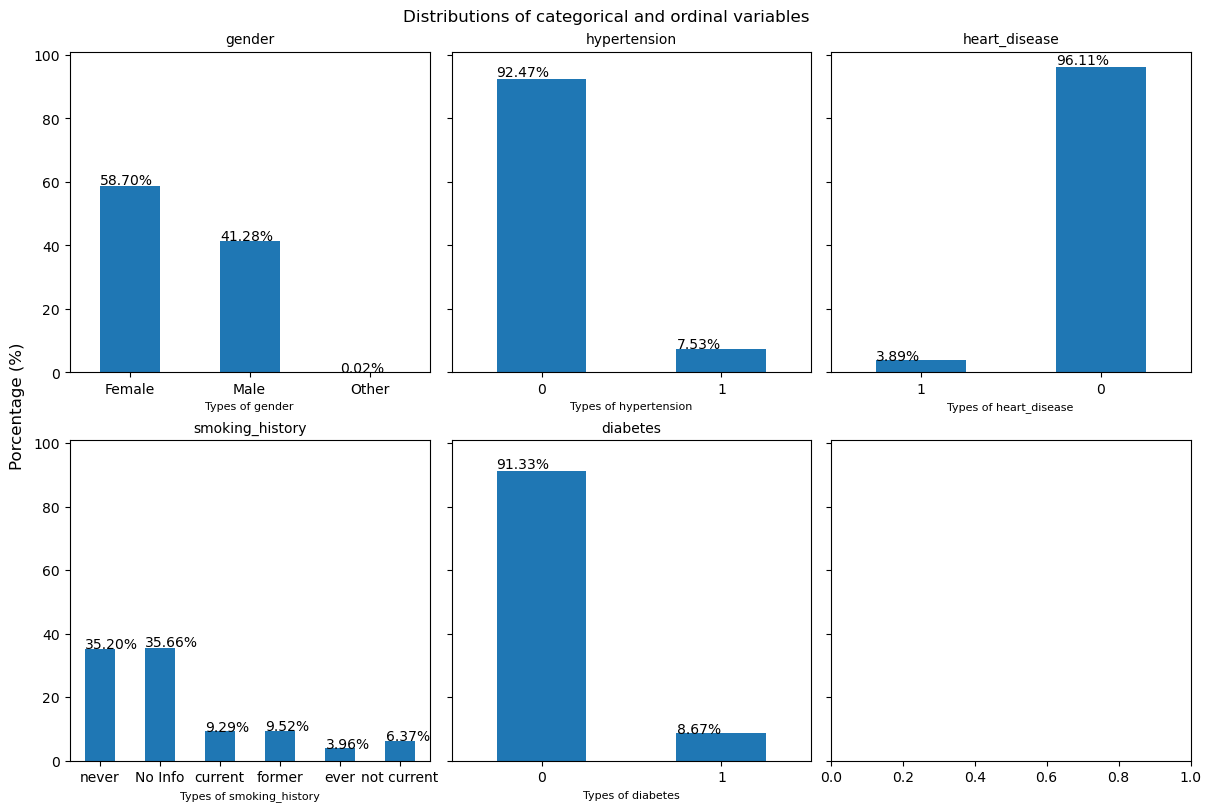

In [ ]:
# visualizing distributions independently of the target value
fig, ax = plt.subplots(rows, cols, constrained_layout=True, sharey=True)
att = 0
for r in range(rows):
    for c in range(cols):
        if att == 5:
            break

        attribute = ordinal_and_categorical_features[att]
        
        group_perc = pd.DataFrame(columns=['Percentage'], index=df[attribute].unique())
        group_perc['Percentage'] = df[attribute].value_counts(normalize=True)
        group_perc['Percentage'] = group_perc['Percentage'].round(4) * 100
        
        group_perc.plot.bar(ax=ax[r, c], rot=0)

        for pat in ax[r, c].patches:
            ax[r, c].annotate(f'{pat.get_height():.2f}%', (pat.get_x() * 1.005, pat.get_height() * 1.01))

        ax[r, c].set_title(f'{attribute}', fontsize=10)
        ax[r, c].get_legend().remove()
        ax[r, c].set_xlabel(f'Types of {attribute}', fontsize=8)

        att += 1
        del group_perc
        
fig.set_size_inches(12, 8)
fig.supylabel('Porcentage (%)')
plt.suptitle('Distributions of categorical and ordinal variables')

plt.show()


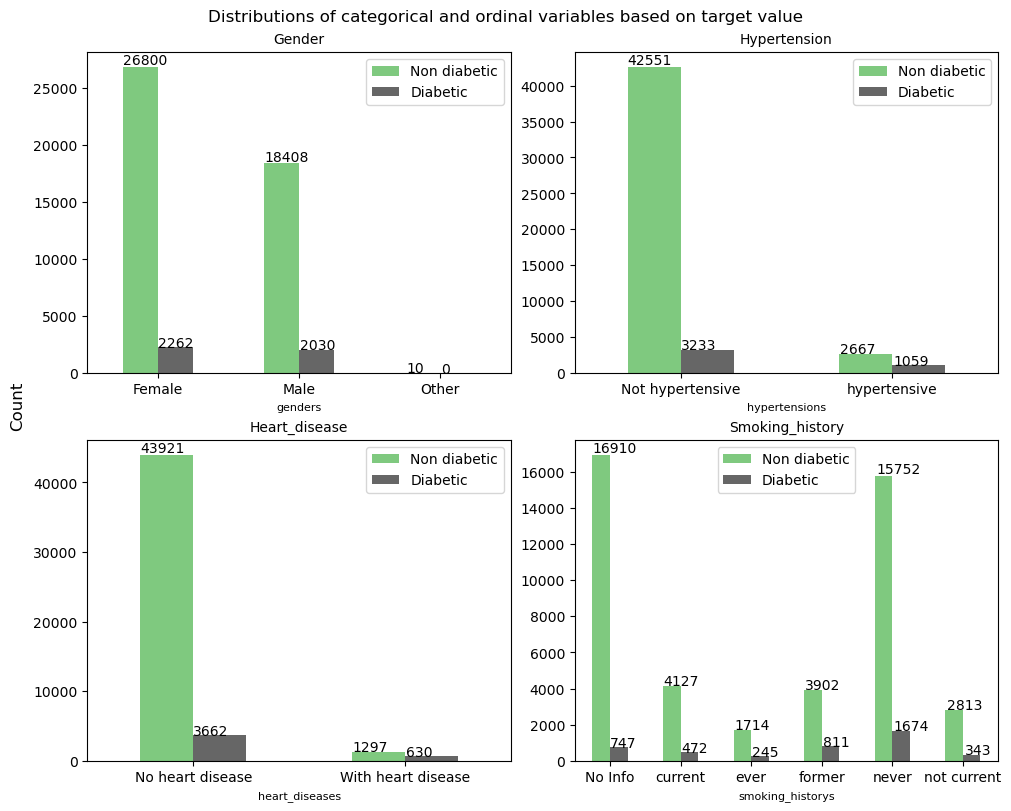

In [ ]:
# visualizing distributions by target value

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True, sharey=False, figsize=(10, 8))

cmap = plt.get_cmap("tab20c")
size = 0.3
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])
att = 0
for r in range(rows):
    for c in range(cols):

        attribute = ordinal_and_categorical_features[att]
        # Not hypertensive
        # No heart disease
        count = pd.DataFrame(df.groupby([attribute]).size(), columns=['Count'])
        
        
        people = pd.DataFrame(df.groupby([attribute, target_colum]).size(), columns=['Count'])
        people = people.reset_index()

        people_pivot = people.pivot(index=attribute, columns=target_colum, values='Count')
        
        people_pivot.plot.bar(ax=ax[r, c], rot=0, colormap='Accent')

        for pat in ax[r, c].patches:
            ax[r, c].annotate(f'{pat.get_height():.0f}', (pat.get_x() * 1.005, pat.get_height() * 1.01))
        
        ax[r, c].set_title(f'{attribute.capitalize()}', fontsize=10)
        ax[r, c].set_xlabel(f'{attribute}s', fontsize=8)


        
        if attribute == 'hypertension':
            ax[r, c].set_xticklabels(['Not hypertensive', 'hypertensive'])

        elif attribute == 'heart_disease':
            ax[r, c].set_xticklabels(['No heart disease', 'With heart disease']) 

        ax[r, c].legend(labels=['Non diabetic', 'Diabetic'])

        att += 1
        del count
        del people

# fig.legend(ax, labels=['Non diabetic', 'Diabetic'], loc="center", title=target_colum, bbox_to_anchor=(0.53, 0.5))      
fig.supylabel('Count')
plt.suptitle('Distributions of categorical and ordinal variables based on target value')

plt.show()


#### Visualizing continuous values (numeric) distribution on dataset

In [7]:
continuous_values = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
rows = 2
cols = 2

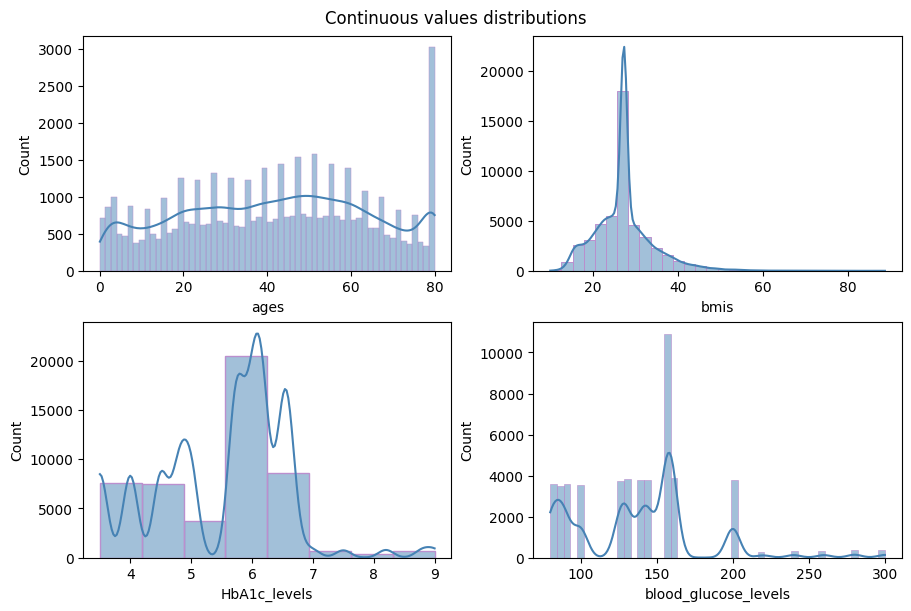

In [14]:
fig, ax = plt.subplots(rows, cols, constrained_layout=True, figsize=(9, 6))
att = 0
bins_values = [60, 30, 8, 50]
for r in range(rows):
    for c in range(cols):
        sns.histplot(data=df, x=continuous_values[att], ax=ax[r, c], kde=True, color='steelblue', edgecolor='#BB8FCE', alpha=0.5, bins=bins_values[att])
# verificar não discretizando 
        ax[r, c].set_xlabel(f'{continuous_values[att]}s')
        att += 1

plt.suptitle('Continuous values distributions')
plt.show()

### Visualizing the correlation between the numerical variables 

<ipython-input-5-5e0d39c65251>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


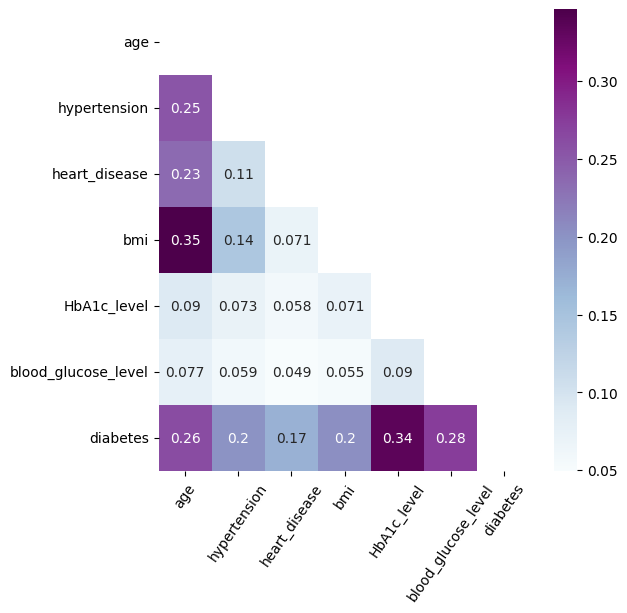

In [5]:
# visualizing correlation between the features
# justificar -> add de spiermman

corr = df.corr(method='spearman')
matrix = np.triu(corr)

fig, ax = plt.subplots(figsize=(6, 6)) 
sns.heatmap(corr, annot=True, ax=ax, cmap='BuPu', mask=matrix)
plt.xticks(rotation=55)
plt.show()